## 期末專題 
## 410978002 統計三 謝元皓


### 習題 1：混合常態參數估計 Normal Mixture 
### 作品目標: 觀察給定不同參數下的混和常態分配的pdf圖形，第一部份比較不同mu的混和常態分佈的pdf圖形,第二部分為描繪出樣本估計的線及真實的pdf曲線。

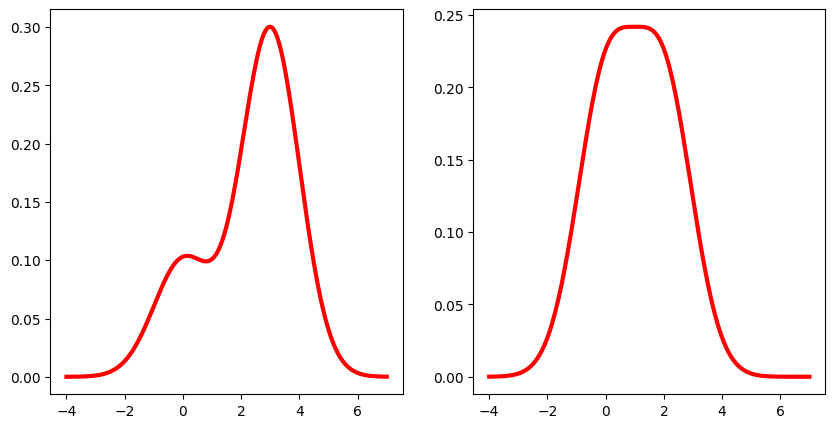

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.stats import norm, binom

# 設定圖片大小 -----------
fig, ax = plt.subplots(1,2,figsize = [10, 5])
# 設定左圖參數 --------------
pi1, mu1, s1, mu2, s2 = 0.25, 0, 1, 3, 1
# 畫混和常態分配的pdf ---------------
f = lambda x: pi1 * norm.pdf(x, loc = mu1,scale = s1) + (1-pi1) * norm.pdf(x, loc = mu2,scale = s2)
x = np.linspace(-4, 7, 200)
ax[0].plot(x, f(x), color = 'r', linewidth = 3, label = 'True mixture')
# 設定右圖參數 --------------
pi1, mu1, s1, mu2, s2 = 0.5, 0, 1, 2, 1
# 畫混和常態分配的pdf  ---------------
f = lambda x: pi1 * norm.pdf(x, loc = mu1,scale = s1) + (1-pi1) * norm.pdf(x, loc = mu2,scale = s2)
x = np.linspace(-4, 7, 200)
ax[1].plot(x, f(x), color = 'r', linewidth = 3, label = 'True mixture')
plt.show()


### 結論: 由上圖可看出，當混和常態的兩樣本平均較遠離時，其常態pdf曲線有較明顯的雙峰;反之，當混和常態的兩樣本平均較接近時，其常態pdf曲線較不易看出其為雙樣本。

Text(0.5, 1.0, 'n = 10000')

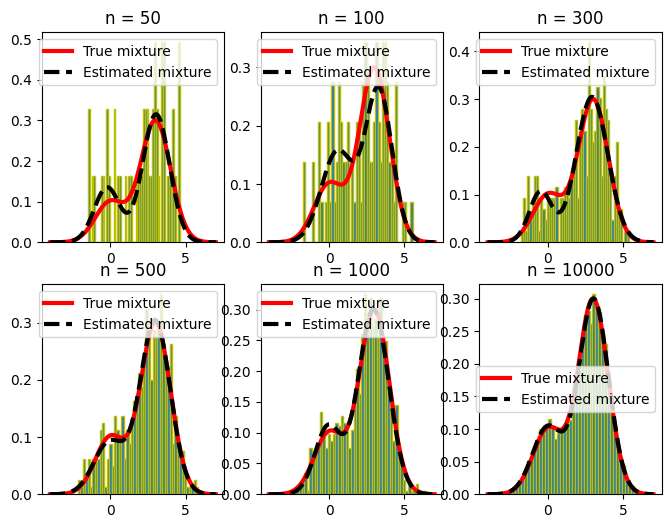

In [12]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.stats import norm, binom
#畫第一張圖
#畫圖形邊框
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
# 給定參數
pi1, mu1, s1, mu2, s2 = 0.25, 0, 1, 3, 1
# 定義混和常態pdf函數
x = np.linspace(-4, 7, 200)
f = lambda x: pi1 * norm.pdf(x, loc = mu1,scale = s1) + (1-pi1) * norm.pdf(x, loc = mu2,scale = s2)
ax1.plot(x, f(x), color = 'r', linewidth = 3, label = 'True mixture')
# 產生樣本 -------
N =  50 
N1 = binom.rvs(N, pi1)
N2 = N - N1 
sample = np.r_[norm.rvs(loc = mu1,scale = s1, size = N1),
norm.rvs(mu2, s2, size = N2)]
# 畫直方圖 ------------------------
ax1.hist(sample, 50, edgecolor = 'y', density = True)

#max mle (min -mle) --------------------
L = lambda x : -np.sum(np.log(x[0] * norm.pdf(sample, loc = x[1], scale = x[2]) + 
(1 - x[0]) * norm.pdf(sample, loc = x[3],scale =  x[4])))
# the constraints, bounds and options
cons = []
bnds = [(0, 1), (-np.inf, np.inf), (0, np.inf), (-np.inf, np.inf), (0, np.inf)]
opts = dict(disp = True, maxiter = 1e4)
x0 = [0.5, 0, 1, 3, 1] # initial guess
res = opt.minimize(L, x0 = x0, 
    bounds = bnds,
    constraints = cons,
    options = opts,
    tol = 1e-8)
f_hat = lambda x: res.x[0] * norm.pdf(x, res.x[1], res.x[2]) + (1-res.x[0]) * norm.pdf(x, res.x[3], res.x[4])
ax1.plot(x, f_hat(x), color = 'k', linestyle = '--', \
    linewidth = 3, label = 'Estimated mixture')
ax1.legend()
ax1.set_title("n = 50")


#畫第二張圖
# 給定參數
pi1, mu1, s1, mu2, s2 = 0.25, 0, 1, 3, 1
# 定義混和常態pdf函數
x = np.linspace(-4, 7, 200)
f = lambda x: pi1 * norm.pdf(x, loc = mu1,scale = s1) + (1-pi1) * norm.pdf(x, loc = mu2,scale = s2)
ax2.plot(x, f(x), color = 'r', linewidth = 3, label = 'True mixture')
# 產生樣本 -------
N =  100 
N1 = binom.rvs(N, pi1)
N2 = N - N1 
sample = np.r_[norm.rvs(loc = mu1,scale = s1, size = N1),
norm.rvs(mu2, s2, size = N2)]
# 畫直方圖 ------------------------
ax2.hist(sample, 50, edgecolor = 'y', density = True)

#max mle (min -mle) --------------------
L = lambda x : -np.sum(np.log(x[0] * norm.pdf(sample, loc = x[1], scale = x[2]) + 
(1 - x[0]) * norm.pdf(sample, loc = x[3],scale =  x[4])))
# the constraints, bounds and options
cons = []
bnds = [(0, 1), (-np.inf, np.inf), (0, np.inf), (-np.inf, np.inf), (0, np.inf)]
opts = dict(disp = True, maxiter = 1e4)
x0 = [0.5, 0, 1, 3, 1] # initial guess
res = opt.minimize(L, x0 = x0, 
    bounds = bnds,
    constraints = cons,
    options = opts,
    tol = 1e-8)
f_hat = lambda x: res.x[0] * norm.pdf(x, res.x[1], res.x[2]) + (1-res.x[0]) * norm.pdf(x, res.x[3], res.x[4])
ax2.plot(x, f_hat(x), color = 'k', linestyle = '--', \
    linewidth = 3, label = 'Estimated mixture')
ax2.legend()
ax2.set_title("n = 100")

#畫第三張圖
# 給定參數
pi1, mu1, s1, mu2, s2 = 0.25, 0, 1, 3, 1
# 定義混和常態pdf函數
x = np.linspace(-4, 7, 200)
f = lambda x: pi1 * norm.pdf(x, loc = mu1,scale = s1) + (1-pi1) * norm.pdf(x, loc = mu2,scale = s2)
ax3.plot(x, f(x), color = 'r', linewidth = 3, label = 'True mixture')
# 產生樣本 -------
N =  300 
N1 = binom.rvs(N, pi1)
N2 = N - N1 
sample = np.r_[norm.rvs(loc = mu1,scale = s1, size = N1),
norm.rvs(mu2, s2, size = N2)]
# 畫直方圖 ------------------------
ax3.hist(sample, 50, edgecolor = 'y', density = True)

#max mle (min -mle) --------------------
L = lambda x : -np.sum(np.log(x[0] * norm.pdf(sample, loc = x[1], scale = x[2]) + 
(1 - x[0]) * norm.pdf(sample, loc = x[3],scale =  x[4])))
# the constraints, bounds and options
cons = []
bnds = [(0, 1), (-np.inf, np.inf), (0, np.inf), (-np.inf, np.inf), (0, np.inf)]
opts = dict(disp = True, maxiter = 1e4)
x0 = [0.5, 0, 1, 3, 1] # initial guess
res = opt.minimize(L, x0 = x0, 
    bounds = bnds,
    constraints = cons,
    options = opts,
    tol = 1e-8)
f_hat = lambda x: res.x[0] * norm.pdf(x, res.x[1], res.x[2]) + (1-res.x[0]) * norm.pdf(x, res.x[3], res.x[4])
ax3.plot(x, f_hat(x), color = 'k', linestyle = '--', \
    linewidth = 3, label = 'Estimated mixture')
ax3.legend()
ax3.set_title("n = 300")

#畫第四張圖
# 給定參數
pi1, mu1, s1, mu2, s2 = 0.25, 0, 1, 3, 1
# 定義混和常態pdf函數
x = np.linspace(-4, 7, 200)
f = lambda x: pi1 * norm.pdf(x, loc = mu1,scale = s1) + (1-pi1) * norm.pdf(x, loc = mu2,scale = s2)
ax4.plot(x, f(x), color = 'r', linewidth = 3, label = 'True mixture')
# 產生樣本 -------
N =  500 
N1 = binom.rvs(N, pi1)
N2 = N - N1 
sample = np.r_[norm.rvs(loc = mu1,scale = s1, size = N1),
norm.rvs(mu2, s2, size = N2)]
# 畫直方圖 ------------------------
ax4.hist(sample, 50, edgecolor = 'y', density = True)

#max mle (min -mle) --------------------
L = lambda x : -np.sum(np.log(x[0] * norm.pdf(sample, loc = x[1], scale = x[2]) + 
(1 - x[0]) * norm.pdf(sample, loc = x[3],scale =  x[4])))
# the constraints, bounds and options
cons = []
bnds = [(0, 1), (-np.inf, np.inf), (0, np.inf), (-np.inf, np.inf), (0, np.inf)]
opts = dict(disp = True, maxiter = 1e4)
x0 = [0.5, 0, 1, 3, 1] # initial guess
res = opt.minimize(L, x0 = x0, 
    bounds = bnds,
    constraints = cons,
    options = opts,
    tol = 1e-8)
f_hat = lambda x: res.x[0] * norm.pdf(x, res.x[1], res.x[2]) + (1-res.x[0]) * norm.pdf(x, res.x[3], res.x[4])
ax4.plot(x, f_hat(x), color = 'k', linestyle = '--', \
    linewidth = 3, label = 'Estimated mixture')
ax4.legend()
ax4.set_title("n = 500")

#畫第五張圖
# 給定參數
pi1, mu1, s1, mu2, s2 = 0.25, 0, 1, 3, 1
# 定義混和常態pdf函數
x = np.linspace(-4, 7, 200)
f = lambda x: pi1 * norm.pdf(x, loc = mu1,scale = s1) + (1-pi1) * norm.pdf(x, loc = mu2,scale = s2)
ax5.plot(x, f(x), color = 'r', linewidth = 3, label = 'True mixture')
# 產生樣本 -------
N =  1000 
N1 = binom.rvs(N, pi1)
N2 = N - N1 
sample = np.r_[norm.rvs(loc = mu1,scale = s1, size = N1),
norm.rvs(mu2, s2, size = N2)]
# 畫直方圖 ------------------------
ax5.hist(sample, 50, edgecolor = 'y', density = True)

#max mle (min -mle) --------------------
L = lambda x : -np.sum(np.log(x[0] * norm.pdf(sample, loc = x[1], scale = x[2]) + 
(1 - x[0]) * norm.pdf(sample, loc = x[3],scale =  x[4])))
# the constraints, bounds and options
cons = []
bnds = [(0, 1), (-np.inf, np.inf), (0, np.inf), (-np.inf, np.inf), (0, np.inf)]
opts = dict(disp = True, maxiter = 1e4)
x0 = [0.5, 0, 1, 3, 1] # initial guess
res = opt.minimize(L, x0 = x0, 
    bounds = bnds,
    constraints = cons,
    options = opts,
    tol = 1e-8)
f_hat = lambda x: res.x[0] * norm.pdf(x, res.x[1], res.x[2]) + (1-res.x[0]) * norm.pdf(x, res.x[3], res.x[4])
ax5.plot(x, f_hat(x), color = 'k', linestyle = '--', \
    linewidth = 3, label = 'Estimated mixture')
ax5.legend()
ax5.set_title("n = 1000")

#畫第六張圖
# 給定參數
pi1, mu1, s1, mu2, s2 = 0.25, 0, 1, 3, 1
# 定義混和常態pdf函數
x = np.linspace(-4, 7, 200)
f = lambda x: pi1 * norm.pdf(x, loc = mu1,scale = s1) + (1-pi1) * norm.pdf(x, loc = mu2,scale = s2)
ax6.plot(x, f(x), color = 'r', linewidth = 3, label = 'True mixture')
# 產生樣本 -------
N =  10000 
N1 = binom.rvs(N, pi1)
N2 = N - N1 
sample = np.r_[norm.rvs(loc = mu1,scale = s1, size = N1),
norm.rvs(mu2, s2, size = N2)]
# 畫直方圖 ------------------------
ax6.hist(sample, 50, edgecolor = 'y', density = True)

#max mle (min -mle) --------------------
L = lambda x : -np.sum(np.log(x[0] * norm.pdf(sample, loc = x[1], scale = x[2]) + 
(1 - x[0]) * norm.pdf(sample, loc = x[3],scale =  x[4])))
# the constraints, bounds and options
cons = []
bnds = [(0, 1), (-np.inf, np.inf), (0, np.inf), (-np.inf, np.inf), (0, np.inf)]
opts = dict(disp = True, maxiter = 1e4)
x0 = [0.5, 0, 1, 3, 1] # initial guess
res = opt.minimize(L, x0 = x0, 
    bounds = bnds,
    constraints = cons,
    options = opts,
    tol = 1e-8)
f_hat = lambda x: res.x[0] * norm.pdf(x, res.x[1], res.x[2]) + (1-res.x[0]) * norm.pdf(x, res.x[3], res.x[4])
ax6.plot(x, f_hat(x), color = 'k', linestyle = '--', \
    linewidth = 3, label = 'Estimated mixture')
ax6.legend()
ax6.set_title("n = 10000")



### 結論與檢討:
- 當固定參數(pi1, mu1, s1, mu2, s2)去做pdf的函數估計值時可以發現，當樣本數N越大時，估計出來的pdf跟實際的混和常態分配pdf差異越來越小。上圖可觀察出，當樣本數=10000時True mixture 跟Estimated mixture 接近完全相等。
- 我嘗試著用迴圈的方式寫出上圖但始終無法成功，因此，用土法煉鋼法寫出上面六張圖再合併在一起。
<hr>

### 習題 2：限制式條件的最大值問題 Constraint optimization

計算下列最大概似估計 MLE 問題的參數 $\alpha$, $\beta$：

$\displaystyle\max_{\alpha,\beta > 0} \ln L(\alpha,\beta)$
其中的聯合概似函數為

L( $\alpha$,$\beta$) =$\prod_{i=1}^n f_t(v_i |\alpha,\beta)F_T(u_i|\alpha,\beta)^{-1}$

where $f_t(v|\alpha,\beta)=\alpha\beta v^{\beta-1}exp(-\alpha v^{\beta})$

$F_T(u|\alpha,\beta)=1-exp(-\alpha u^{\beta})$ \
變數 u,v 的 n 個樣本已知並存在檔案 UV.txt

建議依下列程序，逐步進行：
（不熟悉的部分，再往前面的範例或章節找到可供參考的程式片段）

- 先下載資料檔，取出資料並觀察資料的樣子。

- 目標函數 $\ln L(\alpha,\beta)$ 需要進一步推導到比較適合的樣子，也就是將 $\prod$ 透過 $\ln$ 換成 $\Sigma$。並不是連乘的 $\prod$ 不能計算，非要換成連加的 $\Sigma$ 不可，而是當樣本數多時，連乘的計算比較不穩定，太大或太小的數值連乘可能超過硬體的極限。所以典型的最大概似估計問題，往往會在原目標函數前加上對數 $\ln$ 轉換成連加模式。請盡量將式子推到最精簡。(讀者仍可以試試看直接以 $\ln$ $\prod$ 或 $\prod$ 的函數模式直接計算，也許也會得到相同的答案喔！)

- 利用推導到精簡的目標函數，繪製立體圖與等高線圖。繪圖時，需要摸索參數的範圍，找到最佳的觀察位置。畫得好，隱約可以看出最大值的位置（如下圖）。

- 接著開始部署 minimize 的各項停止條件及計算。有了等高線圖的幫助，通常答案已經呼之欲出，計算的結果只是得到一組更明確的數據。如圖中紅色的 X。

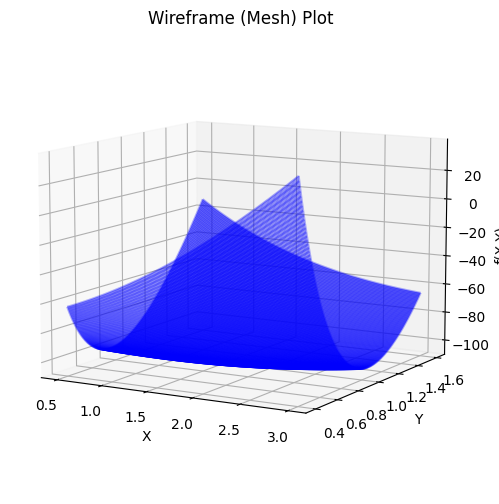

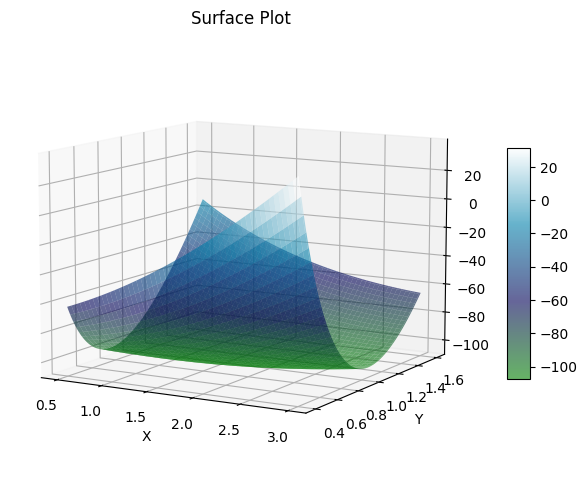

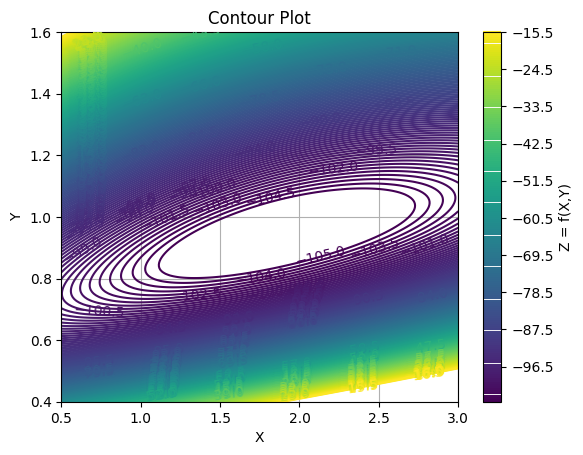

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
# 讀檔且建造向量
D = np.loadtxt('UV.txt', comments='%')
u, v = D[:,0], D[:,1]
n = D.shape[0]
# 寫函式
def f(x):
    z = np.zeros([206, 206])
    for i in range(n):
        z = z + (-1) * (np.log(x[0] * x[1]) + (x[1] - 1) * np.log(v[i]) - x[0]*v[i]**x[1] - \
        np.log(1-np.exp(-x[0]*u[i]**x[1])))   
    return z
a = np.linspace(0.5, 3, n)
b = np.linspace(0.4, 1.6 ,n)
# 製造三維立體圖
X, Y = np.meshgrid(a, b) 
Z = f([X,Y])
# 對於線框，通過 rstride 和 cstride 控制線密度
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
ax.plot_wireframe(X, Y, Z, color ='blue',
    alpha=0.3, rstride = 1, cstride = 1)
ax.set_xlabel('X'), ax.set_ylabel('Y')
ax.set_zlabel('f(X,Y)')
ax.view_init(10, -60)  #(elev=-165, azim=60)
plt.title('Wireframe (Mesh) Plot')
plt.show()

# 畫3d圖
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
surf = ax.plot_surface(X, Y, Z, color = 'r', \
    rstride=4, cstride=4, alpha =0.6, cmap='ocean') # cmap = plt.cm.bone
 # cmap = plt.cm.bone
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10) # aspect = length/width ratio
ax.view_init(10, -60)  #(elev=-165, azim=60)
ax.set_xlabel('X'), ax.set_ylabel('Y')
plt.title('Surface Plot')
plt.show()

# To draw a contour plot
levels = np.arange(-105, -15, 0.5) # levels of contour lines
contours = plt.contour(X, Y, Z, levels=levels) # check dir(contours)
# add function value on each line    
plt.clabel(contours, inline = 0, fontsize = 10) # inline =1 or 0 
cbar = plt.colorbar(contours)

plt.xlabel('X'), plt.ylabel('Y')
cbar.ax.set_ylabel('Z = f(X,Y)') # set colorbar label
# cbar.add_lines(contours) # add contour line levels to the colorbar 
plt.title('Contour Plot')
plt.grid(True)
plt.show()

## 結論: 
- 3D立體圖中可以觀察出X Y Z 座標組合出來的3度空間樣貌，接著再依據3D立體圖畫等高線圖。
- 產生出等高線圖時，我們就可以輕易觀察出函數值的相對位置，並找出相對極值的位置。